<a href="https://colab.research.google.com/github/nizarihsan/Pengolahan-Citra-Digital/blob/main/TugasChapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soal 1: Jenis-Jenis Tepi
 Empat Jenis Tepi dalam Citra Digital
1. Tepi Langsung (Step Edge)
- Definisi: Perubahan intensitas secara mendadak dari satu nilai ke nilai lain tanpa transisi bertahap.
- Contoh:
  - Garis batas antara langit biru dengan bangunan pada sebuah foto.
  - Garis pembatas antara lantai putih dan tembok gelap.
- Karakteristik:
  - Mudah dikenali pada citra dengan kontras tinggi.
  - Pendekatan gradien seperti operator Sobel dan Prewitt efektif mendeteksinya.
2. Tepi Garis (Line Edge)
- Definisi: Area dengan intensitas tinggi diapit oleh intensitas rendah, membentuk pola garis tipis.
- Contoh:
  - Kabel listrik atau antena di langit cerah.
  - Garis batas antara bayangan sempit dan area terang.
- Karakteristik:
  - Deteksi memerlukan sensitivitas pada perubahan lokal yang kecil.
3. Tepi Gradual (Ramp Edge)
- Definisi: Perubahan intensitas terjadi secara perlahan, tidak mendadak.
- Contoh:
  - Bayangan pada dinding yang bertransisi dari terang ke gelap.
  - Gradasi warna dalam ilustrasi digital.
- Karakteristik:
  - Sulit dideteksi dengan metode sederhana karena perubahan intensitasnya lemah.
4. Tepi Derau (Noisy Edge)
- Definisi: Tepi yang muncul karena gangguan noise, biasanya terlihat pada citra berkualitas rendah.
- Contoh:
  - Gambar buram atau berbintik akibat gangguan kamera.
  - Noise salt-and-pepper pada gambar digital.
- Karakteristik:
  - Derau sering kali salah dikenali sebagai tepi sejati.
Mengapa Tepi dengan Derau Memerlukan Pendekatan Khusus?
Tepi dengan derau sulit dibedakan dari tepi asli karena noise menyebabkan fluktuasi intensitas. Untuk itu:
- Filtering: Gaussian filter atau median filter digunakan untuk mengurangi noise.
- Metode Robust: Operator seperti Canny menggunakan multi-step yang mencakup smoothing untuk meningkatkan akurasi.

SOAL 2: Penjelasan Operator Sobel
Operator Sobel menghitung gradien intensitas dengan memanfaatkan konvolusi kernel khusus. Operator ini mendeteksi perubahan intensitas pada sumbu x dan y. Kombinasi hasilnya memberikan peta tepi lengkap.


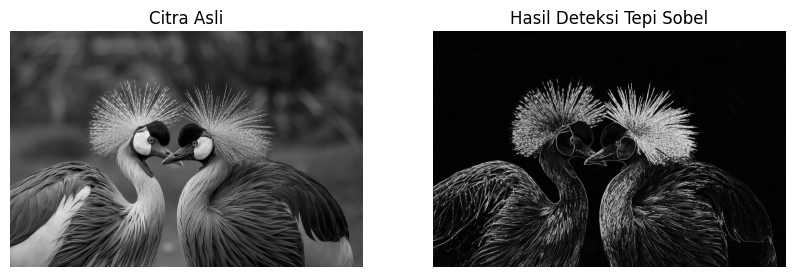

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra dalam grayscale
image = cv2.imread('burung.jpg', cv2.IMREAD_GRAYSCALE)

# Operator Sobel pada sumbu x dan y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien x
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien y

# Kombinasi gradien
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Normalisasi hasil untuk visualisasi
sobel_normalized = cv2.convertScaleAbs(sobel_combined)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Citra Asli")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hasil Deteksi Tepi Sobel")
plt.imshow(sobel_normalized, cmap='gray')
plt.axis('off')
plt.show()

Langkah-Langkah

1. Input Citra: Gambar dibaca dalam mode grayscale untuk menyederhanakan proses.
2. Gradien x dan y: Kernel Sobel diterapkan pada sumbu x dan y untuk menghitung perubahan intensitas.
3. Gabungan Gradien: Magnitudo gradien dihitung menggunakan formula:
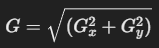
4. Normalisasi: Hasilnya diubah menjadi skala 8-bit agar dapat divisualisasikan.
5. Visualisasi: Hasil deteksi tepi ditampilkan menggunakan pustaka matplotlib.

Soal 3: Perbandingan Operator Pendeteksi Tepi
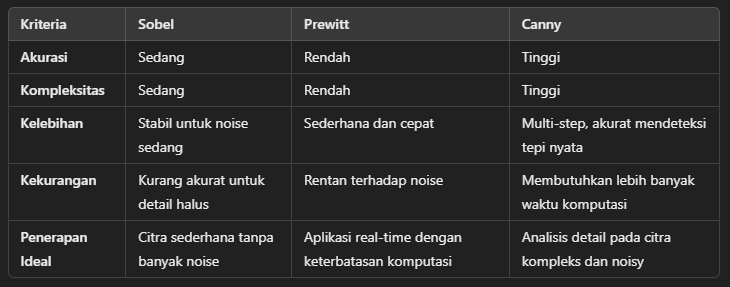
Situasi Ketika Canny Direkomendasikan
- Ketika deteksi tepi memerlukan tingkat presisi tinggi.
- Dalam citra dengan noise, karena metode ini memiliki tahapan smoothing yang mengurangi gangguan.
- Aplikasi seperti segmentasi objek atau visi komputer untuk mendeteksi kontur kompleks.

Soal 4: Pendeteksian Tepi pada Citra Noisy
Langkah-Langkah
- Input Citra dengan Noise: Gambar mengandung derau salt-and-pepper.
- Smoothing: Filtering dilakukan menggunakan Gaussian filter untuk mengurangi derau.
- Deteksi Tepi: Sobel dan Canny digunakan untuk mendeteksi tepi.
- Analisis Perbandingan: Hasil dibandingkan antara metode dan dengan citra asli.

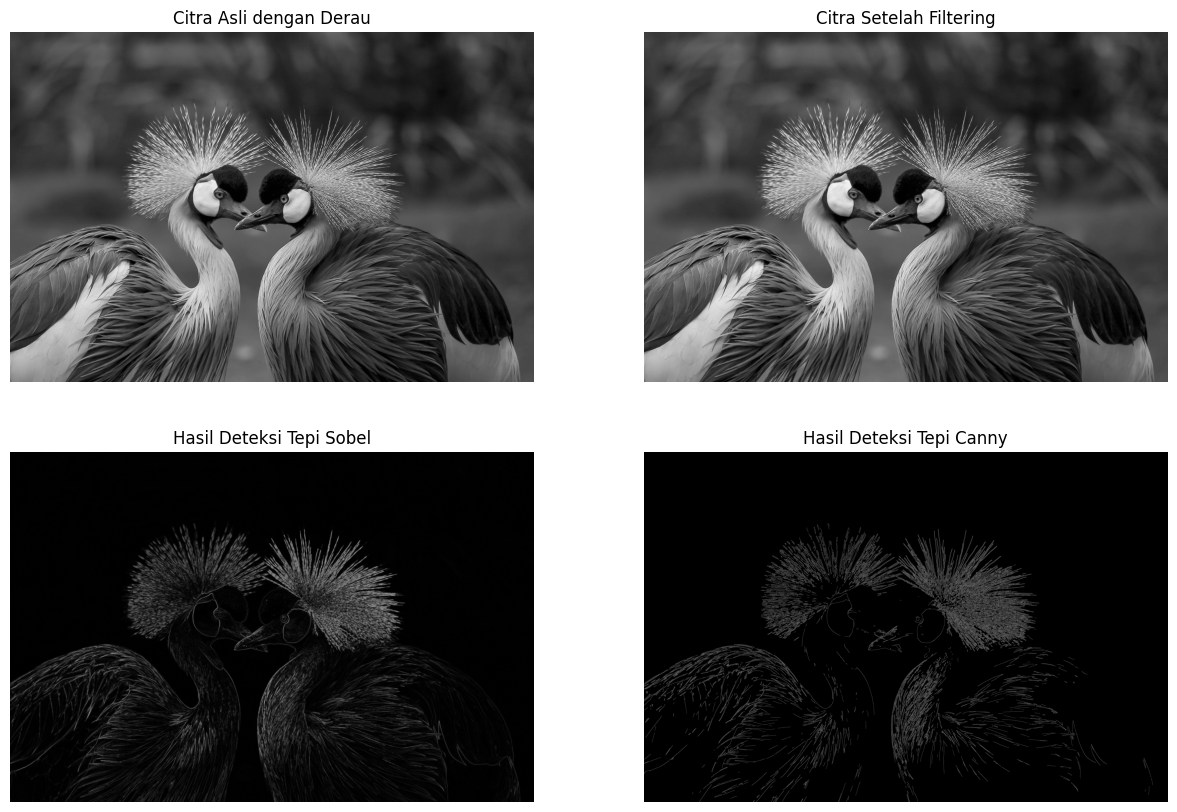

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra noisy
noisy_image = cv2.imread('burung.jpg', cv2.IMREAD_GRAYSCALE)

# Filtering menggunakan Gaussian filter
smoothed_image = cv2.GaussianBlur(noisy_image, (5, 5), 1)

# Pendeteksian tepi menggunakan Sobel
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Pendeteksian tepi menggunakan Canny
canny_edges = cv2.Canny(smoothed_image, 100, 200)

# Visualisasi hasil
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title("Citra Asli dengan Derau")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Citra Setelah Filtering")
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Hasil Deteksi Tepi Sobel")
plt.imshow(sobel_combined, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Hasil Deteksi Tepi Canny")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.show()

Analisis Hasil
- Citra Asli: Derau mengganggu, menghasilkan tepi palsu.
- Setelah Smoothing: Derau berkurang, deteksi tepi menjadi lebih akurat.
- Hasil Sobel: Deteksi sederhana, kurang mampu membedakan detail halus.
- Hasil Canny: Memberikan detail tepi yang lebih baik karena metode multi-step, meskipun lebih kompleks.